<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [7]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [9]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [10]:
# Affichage lignes + colonnes dataframe "Population"
population.shape

(1416, 3)

In [11]:
#Importation du fichier dispo_alimentaire.csv
dispoAlimentaire = pd.read_csv('dispo_alimentaire.csv')
dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# Affichage type données dataframe "dispoAlimentaire"
dispoAlimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [13]:
#Importation du fichier aide_alimentaire.csv
aideAlimentaire = pd.read_csv('aide_alimentaire.csv')
aideAlimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [14]:
# Affichage lignes + colonnes dataframe "aideAlimentaire"
aideAlimentaire.shape

(1475, 4)

In [15]:
# Affichage type données dataframe "aideAlimentaire"
aideAlimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [16]:
#Importation du fichier sous_nutrition.csv
sousNutrition = pd.read_csv('sous_nutrition.csv')
sousNutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [17]:
# Affichage lignes + colonnes dataframe "sousNutrition"
sousNutrition.shape

(1218, 3)

In [18]:
# Affichage type données dataframe "sousNutrition"
sousNutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [19]:
# Colonne Année renommée en AnnéeTranche

print(sousNutrition)

sousNutrition.rename(columns={'Année': 'AnnéeTranche'}, inplace=True) 
print(sousNutrition)

             Zone      Année Valeur
0     Afghanistan  2012-2014    8.6
1     Afghanistan  2013-2015    8.8
2     Afghanistan  2014-2016    8.9
3     Afghanistan  2015-2017    9.7
4     Afghanistan  2016-2018   10.5
...           ...        ...    ...
1213     Zimbabwe  2013-2015    NaN
1214     Zimbabwe  2014-2016    NaN
1215     Zimbabwe  2015-2017    NaN
1216     Zimbabwe  2016-2018    NaN
1217     Zimbabwe  2017-2019    NaN

[1218 rows x 3 columns]
             Zone AnnéeTranche Valeur
0     Afghanistan    2012-2014    8.6
1     Afghanistan    2013-2015    8.8
2     Afghanistan    2014-2016    8.9
3     Afghanistan    2015-2017    9.7
4     Afghanistan    2016-2018   10.5
...           ...          ...    ...
1213     Zimbabwe    2013-2015    NaN
1214     Zimbabwe    2014-2016    NaN
1215     Zimbabwe    2015-2017    NaN
1216     Zimbabwe    2016-2018    NaN
1217     Zimbabwe    2017-2019    NaN

[1218 rows x 3 columns]


In [20]:
# Conversion Année en type String

sousNutrition['AnnéeTranche'] = sousNutrition['AnnéeTranche'].astype(str)
print(sousNutrition)

             Zone AnnéeTranche Valeur
0     Afghanistan    2012-2014    8.6
1     Afghanistan    2013-2015    8.8
2     Afghanistan    2014-2016    8.9
3     Afghanistan    2015-2017    9.7
4     Afghanistan    2016-2018   10.5
...           ...          ...    ...
1213     Zimbabwe    2013-2015    NaN
1214     Zimbabwe    2014-2016    NaN
1215     Zimbabwe    2015-2017    NaN
1216     Zimbabwe    2016-2018    NaN
1217     Zimbabwe    2017-2019    NaN

[1218 rows x 3 columns]


In [21]:
#Transformation en valeurs numériques (année en type object) après avoir neutralisé le '-' entre les années
sousNutrition[['Debut', 'Fin']] = sousNutrition['AnnéeTranche'].str.split('-',  n = 1, expand = True).apply(pd.to_numeric)

#Calcul de la moyenne entre l'année de début et de fin pour obtenir une année unique puis conversion en type Integer
sousNutrition['Année'] = sousNutrition[['Debut','Fin']].mean(axis = 1).astype(int)

In [22]:
# Suppression des colonnes Début et Fin qui ont été crées précédemment pour les besoins du split
sousNutrition = sousNutrition.drop(['Debut','Fin'],axis = 1)

In [23]:
# Suppression de la colonne AnnéeTranche
sousNutrition = sousNutrition.drop(['AnnéeTranche'],axis = 1)

print(sousNutrition)

             Zone Valeur  Année
0     Afghanistan    8.6   2013
1     Afghanistan    8.8   2014
2     Afghanistan    8.9   2015
3     Afghanistan    9.7   2016
4     Afghanistan   10.5   2017
...           ...    ...    ...
1213     Zimbabwe    NaN   2014
1214     Zimbabwe    NaN   2015
1215     Zimbabwe    NaN   2016
1216     Zimbabwe    NaN   2017
1217     Zimbabwe    NaN   2018

[1218 rows x 3 columns]


In [24]:
# Liste des pays dont aucune valeur n'est renseignée - peut fausser les résultats si calculs de moyennes par la suite
sousNutrition.loc[sousNutrition['Valeur'].isna()].groupby('Zone')['Valeur'].sum().index

Index(['Allemagne', 'Andorre', 'Antigua-et-Barbuda', 'Argentine', 'Australie',
       'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Belgique',
       ...
       'Tuvalu', 'Ukraine', 'Uruguay', 'Yémen', 'Zambie', 'Zimbabwe',
       'Érythrée', 'États-Unis d'Amérique', 'Îles Cook', 'Îles Marshall'],
      dtype='object', name='Zone', length=101)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [27]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [28]:
#Consulter le nombre de colonnes
len(population.columns)
print("Le tableau Population a",len(population.columns),"colonnes.")

#La nature des données dans chacune des colonnes
print(population.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
len(population['Zone'])
print("La colonne Zone a",len(population['Zone']),"lignes.")
print("La colonne Année a",len(population['Année']),"lignes.")
print("La colonne Valeur a",len(population['Valeur']),"lignes.")

Le tableau Population a 3 colonnes.
Zone       object
Année       int64
Valeur    float64
dtype: object
La colonne Zone a 1416 lignes.
La colonne Année a 1416 lignes.
La colonne Valeur a 1416 lignes.


In [29]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [30]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000 (fichier csv en milliers d'habitants)
population['Valeur']=population['Valeur']*1000
print(population)

             Zone  Année      Valeur
0     Afghanistan   2013  32269589.0
1     Afghanistan   2014  33370794.0
2     Afghanistan   2015  34413603.0
3     Afghanistan   2016  35383032.0
4     Afghanistan   2017  36296113.0
...           ...    ...         ...
1411     Zimbabwe   2014  13586707.0
1412     Zimbabwe   2015  13814629.0
1413     Zimbabwe   2016  14030331.0
1414     Zimbabwe   2017  14236595.0
1415     Zimbabwe   2018  14438802.0

[1416 rows x 3 columns]


In [31]:
#changement du nom de la colonne Valeur par Population
# Inplace = True pour modifier le DF au lieu d'en créer une nouvelle copie
population.rename(columns={'Valeur': 'Population'}, inplace=True) 
print(population)

             Zone  Année  Population
0     Afghanistan   2013  32269589.0
1     Afghanistan   2014  33370794.0
2     Afghanistan   2015  34413603.0
3     Afghanistan   2016  35383032.0
4     Afghanistan   2017  36296113.0
...           ...    ...         ...
1411     Zimbabwe   2014  13586707.0
1412     Zimbabwe   2015  13814629.0
1413     Zimbabwe   2016  14030331.0
1414     Zimbabwe   2017  14236595.0
1415     Zimbabwe   2018  14438802.0

[1416 rows x 3 columns]


In [32]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [34]:
#Afficher les dimensions du dataset
dispoAlimentaire.shape

(15605, 18)

In [35]:
#Consulter le nombre de colonnes
len(dispoAlimentaire.columns)
print("Le tableau Disponibilité Alimentaire a",len(dispoAlimentaire.columns),"colonnes.")

Le tableau Disponibilité Alimentaire a 18 colonnes.


In [36]:
#Affichage les 5 premières lignes de la table
dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [37]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
# 10 colonnes de type Float + utilisation de la fonction apply() pour appliquer la multiplication à plusieurs colonnes en même temps
dispoAlimentaire[['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']]*=1000
print(dispoAlimentaire['Aliments pour animaux'],dispoAlimentaire['Autres Utilisations'],dispoAlimentaire['Disponibilité intérieure'],dispoAlimentaire['Exportations - Quantité'],dispoAlimentaire['Importations - Quantité'],dispoAlimentaire['Nourriture'],dispoAlimentaire['Pertes'],dispoAlimentaire['Production'],dispoAlimentaire['Semences'],dispoAlimentaire['Traitement'],dispoAlimentaire['Variation de stock'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15600   NaN
15601   NaN
15602   NaN
15603   NaN
15604   NaN
Name: Aliments pour animaux, Length: 15605, dtype: float64 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15600   NaN
15601   NaN
15602   NaN
15603   NaN
15604   NaN
Name: Autres Utilisations, Length: 15605, dtype: float64 0        53000.0
1        41000.0
2         2000.0
3            0.0
4        82000.0
          ...   
15600     3000.0
15601     2000.0
15602        0.0
15603        0.0
15604        0.0
Name: Disponibilité intérieure, Length: 15605, dtype: float64 0           NaN
1        2000.0
2           NaN
3           NaN
4           NaN
          ...  
15600       NaN
15601       NaN
15602       NaN
15603       0.0
15604       0.0
Name: Exportations - Quantité, Length: 15605, dtype: float64 0            NaN
1        40000.0
2         2000.0
3            0.0
4        82000.0
          ...   
15600        0.0
15601     2000.

In [38]:
#Affichage les 5 premières lignes de la table
dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53000.0,NaN,NaN,53000.0,NaN,53000.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2000.0,NaN,2000.0,2000.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82000.0,NaN,82000.0,82000.0,NaN,NaN,NaN,NaN,NaN


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [40]:
#Afficher les dimensions du dataset
aideAlimentaire.shape

(1475, 4)

In [41]:
#Consulter le nombre de colonnes
len(aideAlimentaire.columns)
print("Le tableau Aide Alimentaire a",len(aideAlimentaire.columns),"colonnes.")

Le tableau Aide Alimentaire a 4 colonnes.


In [42]:
#Affichage les 5 premières lignes de la table
aideAlimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [43]:
#changement du nom de la colonne Pays bénéficiaire par Zone
# Inplace = True pour modifier le DF au lieu d'en créer une nouvelle copie
aideAlimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True) 
display(aideAlimentaire)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [44]:
##Changement du nom de la colonne Valeur par Aide_alimentaire
aideAlimentaire.rename(columns={'Valeur': 'Aide_alimentaire'}, inplace=True) 
display(aideAlimentaire)

#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aideAlimentaire['Aide_alimentaire']*=1000
display(aideAlimentaire)

,Zone,Année,Produit,Aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


,Zone,Année,Produit,Aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96000
1471,Zimbabwe,2013,Non-céréales,5022000
1472,Zimbabwe,2014,Non-céréales,2310000
1473,Zimbabwe,2015,Non-céréales,306000


In [45]:
#Affichage les 5 premières lignes de la table
aideAlimentaire.head()

,Zone,Année,Produit,Aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [47]:
#Afficher les dimensions du dataset
sousNutrition.shape

(1218, 3)

In [48]:
#Consulter le nombre de colonnes
len(sousNutrition.columns)
print("Le tableau Sous Nutrition a",len(sousNutrition.columns),"colonnes.")

Le tableau Sous Nutrition a 3 colonnes.


In [49]:
#Afficher les 5 premières lignes de la table
sousNutrition.head()

,Zone,Valeur,Année
0,Afghanistan,8.6,2013
1,Afghanistan,8.8,2014
2,Afghanistan,8.9,2015
3,Afghanistan,9.7,2016
4,Afghanistan,10.5,2017


In [50]:
#Ajout : Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN) => voir ci-dessus
sousNutrition['Valeur'] = sousNutrition['Valeur'].replace('<0.1','0')

In [51]:
print(pd.to_numeric(sousNutrition['Valeur'],errors='coerce'))

0        8.6
1        8.8
2        8.9
3        9.7
4       10.5
        ... 
1213     NaN
1214     NaN
1215     NaN
1216     NaN
1217     NaN
Name: Valeur, Length: 1218, dtype: float64


In [52]:
#Ajout : Liste des pays dont aucune valeur n'est renseignée - peut fausser les résultats si calculs de moyennes par la suite
sousNutrition.loc[sousNutrition['Valeur'].isna()].groupby('Zone')['Valeur'].sum().index

Index(['Allemagne', 'Andorre', 'Antigua-et-Barbuda', 'Argentine', 'Australie',
       'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Belgique',
       ...
       'Tuvalu', 'Ukraine', 'Uruguay', 'Yémen', 'Zambie', 'Zimbabwe',
       'Érythrée', 'États-Unis d'Amérique', 'Îles Cook', 'Îles Marshall'],
      dtype='object', name='Zone', length=101)

In [53]:
#Changement du nom de la colonne Valeur par sous_nutrition
# Inplace = True pour modifier le DF au lieu d'en créer une nouvelle copie
sousNutrition.rename(columns={'Valeur': 'Sous_nutrition'},inplace=True) 
display(sousNutrition)

,Zone,Sous_nutrition,Année
0,Afghanistan,8.6,2013
1,Afghanistan,8.8,2014
2,Afghanistan,8.9,2015
3,Afghanistan,9.7,2016
4,Afghanistan,10.5,2017
...,...,...,...
1213,Zimbabwe,NaN,2014
1214,Zimbabwe,NaN,2015
1215,Zimbabwe,NaN,2016
1216,Zimbabwe,NaN,2017


In [54]:
#Multiplication de la colonne sous_nutrition par 1 000 000 (fichier csv en millions d'habitants)
sousNutrition['Sous_nutrition']=sousNutrition['Sous_nutrition'].astype(float)
sousNutrition['Sous_nutrition']*=1000000
display(sousNutrition)

,Zone,Sous_nutrition,Année
0,Afghanistan,8600000.0,2013
1,Afghanistan,8800000.0,2014
2,Afghanistan,8900000.0,2015
3,Afghanistan,9700000.0,2016
4,Afghanistan,10500000.0,2017
...,...,...,...
1213,Zimbabwe,NaN,2014
1214,Zimbabwe,NaN,2015
1215,Zimbabwe,NaN,2016
1216,Zimbabwe,NaN,2017


In [55]:
#Afficher les 5 premières lignes de la table
sousNutrition.head()

,Zone,Sous_nutrition,Année
0,Afghanistan,8600000.0,2013
1,Afghanistan,8800000.0,2014
2,Afghanistan,8900000.0,2015
3,Afghanistan,9700000.0,2016
4,Afghanistan,10500000.0,2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [57]:
# Etape intermédiaire : créer un dataframe population uniquement pour 2017
population2017=population.loc[population['Année']==2017,:]
display(population2017)

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


In [58]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population2017SousNutrition = pd.merge(population2017, sousNutrition, on=['Zone', 'Année'], how='left').reset_index()

#Affichage dataset pour l'année 2017
display(population2017SousNutrition)

,index,Zone,Année,Population,Sous_nutrition
0,0,Afghanistan,2017,36296113.0,10500000.0
1,1,Afrique du Sud,2017,57009756.0,3100000.0
2,2,Albanie,2017,2884169.0,100000.0
3,3,Algérie,2017,41389189.0,1300000.0
4,4,Allemagne,2017,82658409.0,NaN
...,...,...,...,...,...
231,231,Venezuela (République bolivarienne du),2017,29402484.0,8000000.0
232,232,Viet Nam,2017,94600648.0,6500000.0
233,233,Yémen,2017,27834819.0,NaN
234,234,Zambie,2017,16853599.0,NaN


In [59]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
nombre_personnes_sous_nutrition_2017 = population2017SousNutrition['Sous_nutrition'].sum()
print(nombre_personnes_sous_nutrition_2017)
print(round(nombre_personnes_sous_nutrition_2017/1000000),'millions de personnes sont en état de sous-nutrition en 2017.')

535700000.0
536 millions de personnes sont en état de sous-nutrition en 2017.


In [60]:
# Commentaire : Aucune donnée renseignée pour certains pays. Isoler les pays dont la data n'est pas renseignée pour ne pas fausser le calcul.

# Total population mondiale (avec valeurs nulles en colonne "Sous_nutrition")
population_totale_2017_avec_valeurs_nulles = population2017SousNutrition['Population'].sum()
print('La population mondiale est de', round(population_totale_2017_avec_valeurs_nulles/1000000),'millions de personnes (incluant les pays non renseignés).')

# Total population mondiale (exclut valeurs nulles en colonne "Sous_nutrition") => on retient ce montant pour notre proportion
population_totale_2017_sans_valeurs_nulles = population_totale_2017_avec_valeurs_nulles - (population2017SousNutrition.loc[population2017SousNutrition['Sous_nutrition'].isna(),'Population'].sum())
print('La population mondiale est de', round(population_totale_2017_sans_valeurs_nulles/1000000),'millions de personnes (excluant les pays non renseignés).')

#Calcul de la proportion de personnes en sous-nutrition
proportion_sous_nutrition_2017 = (nombre_personnes_sous_nutrition_2017/population_totale_2017_sans_valeurs_nulles)
print('La proportion de personnes en sous-nutrition dans le monde est de', round(proportion_sous_nutrition_2017*100,2),'% (excluant les pays non renseignés).')

La population mondiale est de 7548 millions de personnes (incluant les pays non renseignés).
La population mondiale est de 4183 millions de personnes (excluant les pays non renseignés).
La proportion de personnes en sous-nutrition dans le monde est de 12.81 % (excluant les pays non renseignés).


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [62]:
#Combien mange en moyenne un être humain ? Source => https://sante.gouv.fr/IMG/pdf/conso.pdf
print('Un être humain mange en moyenne pour 2400 calories/jour (Homme) et 1800 calories/jour (Femme), soit une moyenne de 2100 calories/jour tous genres confondus.')

Un être humain mange en moyenne pour 2400 calories/jour (Homme) et 1800 calories/jour (Femme), soit une moyenne de 2100 calories/jour tous genres confondus.


In [63]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

#Commentaire : Groupement par zone en délaissant les notions de produit et d'origine
dispoAlimentaireZone=dispoAlimentaire.groupby('Zone')[['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']].sum().reset_index()

#Commentaire : On peut enfin procéder à la jointure avec clé = zone et pour type de jointure à gauche car la table dispoAlimentaire comporte plus de zones que la table population (toutes les zones dans la table population apparaissent aussi dans la table dispoAlimentaire, ce qui n'est pas le cas dans l'autre sens)
populationDispoAlimentaire=pd.merge(dispoAlimentaireZone, population2017, on=['Zone'], how='left')

In [64]:
#Affichage du nouveau dataframe
display(populationDispoAlimentaire)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0,2017.0,36296113.0
1,Afrique du Sud,5309000.0,876000.0,3020.0,564.80,83.58,85.33,61256000.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0,2017.0,57009756.0
2,Albanie,660000.0,174000.0,3188.0,1095.54,106.48,111.37,4758000.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0,2017.0,2884169.0
3,Algérie,4352000.0,1707000.0,3293.0,809.13,76.48,91.92,42630000.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0,2017.0,41389189.0
4,Allemagne,30209000.0,7711000.0,3503.0,957.52,141.62,101.39,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0,2017.0,82658409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174000.0,2689000.0,3275.0,700.24,87.16,104.51,11850000.0,4343000.0,15327000.0,6548000.0,705000.0,1192000.0,3000.0,804000.0,-327000.0,2017.0,9487203.0
170,Équateur,1200000.0,1909000.0,2346.0,544.91,94.64,61.30,18614000.0,8002000.0,1725000.0,8574000.0,707000.0,24337000.0,138000.0,6200000.0,557000.0,2017.0,16785361.0
171,États-Unis d'Amérique,148432000.0,154699000.0,3682.0,1002.39,161.37,109.42,777992000.0,163524000.0,81887000.0,320889000.0,7162000.0,894668000.0,10403000.0,141010000.0,-35032000.0,2017.0,325084756.0
172,Éthiopie,685000.0,3641000.0,2129.0,354.55,25.89,60.39,44014000.0,941000.0,1711000.0,33361000.0,2256000.0,46102000.0,640000.0,3443000.0,-2857000.0,2017.0,106399924.0


In [65]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
#Explications : pour chaque zone multiplier colonne "Disponibilité alimentaire (Kcal/personne/jour)" par "Population"
populationDispoAlimentaire['Dispo_kcal']=populationDispoAlimentaire['Disponibilité alimentaire (Kcal/personne/jour)']*populationDispoAlimentaire['Population']
populationDispoAlimentaire.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Dispo_kcal
0,Afghanistan,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0,2017.0,36296113.0,7.574999e+10
1,Afrique du Sud,5309000.0,876000.0,3020.0,564.80,83.58,85.33,61256000.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0,2017.0,57009756.0,1.721695e+11
2,Albanie,660000.0,174000.0,3188.0,1095.54,106.48,111.37,4758000.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0,2017.0,2884169.0,9.194731e+09
3,Algérie,4352000.0,1707000.0,3293.0,809.13,76.48,91.92,42630000.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0,2017.0,41389189.0,1.362946e+11
4,Allemagne,30209000.0,7711000.0,3503.0,957.52,141.62,101.39,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0,2017.0,82658409.0,2.895524e+11


In [66]:
#Calcul du nombre d'humains pouvant être nourris

# COMMENTAIRES PERSONNELS : SOMME ((Dispo par pays)x(Pop totale par pays))= kcal totale mondiale
# (Nb hommes pouvant etre nourris) x (Kcal/jr/homme besoins) = kcal totale mondiale
# Nb hommes pouvant etre nourris = kcal totale mondiale / (Kcal/jr/homme besoins) 
# soit [ Nb hommes pouvant etre nourris = SOMME ((Dispo par pays)x(Pop totale par pays)) / (Kcal/jr/homme besoins) ]

#Définition de la valeur 'kcal_moyen_jour' qui correspond à un besoin journalier moyen de 2100 calories par être humain 
kcal_moyen_jour = 2100

#Calcul final : Nombre hommes pouvant etre nourris = SOMME ((Dispo par pays)x(Pop totale par pays)) / (Kcal/jr/homme besoins) ]
nombre_theorique_nourris=round(((populationDispoAlimentaire['Dispo_kcal']).sum())/kcal_moyen_jour)
print('En théorie,',nombre_theorique_nourris,'hommes pourraient être nourris dans le monde avec la disponibilité alimentaire totale en 2017.')

#Commentaires : Nombre total de la population mondiale en 2017
population_totale_2017=round(population2017['Population'].sum())
print('En 2017, la population totale mondiale est de',population_totale_2017,'hommes.')
print('Cela représente',round((nombre_theorique_nourris/population_totale_2017)*100),'% de la population mondiale.')

# Combien de Kcal par personne et par jour ?
kcal_DispoAlimentaire = round((populationDispoAlimentaire['Dispo_kcal'].sum())/(populationDispoAlimentaire['Population'].sum()))
print('Cela représente',kcal_DispoAlimentaire,'Kcal/jour/personne.')

En théorie, 9961421251 hommes pourraient être nourris dans le monde avec la disponibilité alimentaire totale en 2017.
En 2017, la population totale mondiale est de 7548134111 hommes.
Cela représente 132 % de la population mondiale.
Cela représente 2869 Kcal/jour/personne.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [68]:
#Calcul du nombre de kcal disponible pour les végétaux

#Commentaire : Groupement par zone après avoir filtré uniquement les produits origne = vegetale

dispoVegetaleZone=(dispoAlimentaire.loc[dispoAlimentaire['Origine'] == 'vegetale'].groupby(['Zone'])[['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']].sum().reset_index())

#Commentaire : Jointure avec clé = zone et pour type de jointure à gauche car la table dispoVegetale comporte plus de zones que la table population (toutes les zones dans la table population apparaissent aussi dans la table dispoAlimentaire, ce qui n'est pas le cas dans l'autre sens)
populationDispoVegetale=pd.merge(dispoVegetaleZone, population2017, on=['Zone'], how='left')

#Explications : pour chaque zone multiplier colonne "Disponibilité alimentaire (Kcal/personne/jour)" par "Population"
populationDispoVegetale['Dispo_kcal']=populationDispoVegetale['Disponibilité alimentaire (Kcal/personne/jour)']*populationDispoVegetale['Population']
populationDispoVegetale.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Dispo_kcal
0,Afghanistan,645000.0,415000.0,1871.0,271.49,18.27,46.05,10884000.0,278000.0,2638000.0,8293000.0,1072000.0,8891000.0,393000.0,63000.0,-368000.0,2017.0,36296113.0,6.791003e+10
1,Afrique du Sud,5122000.0,761000.0,2533.0,425.17,48.92,48.94,53439000.0,10586000.0,6468000.0,22441000.0,2110000.0,55649000.0,186000.0,22819000.0,1912000.0,2017.0,57009756.0,1.444057e+11
2,Albanie,559000.0,172000.0,2203.0,706.49,38.76,51.96,3326000.0,84000.0,846000.0,2241000.0,182000.0,2609000.0,55000.0,113000.0,-45000.0,2017.0,2884169.0,6.353824e+09
3,Algérie,4352000.0,1706000.0,2915.0,632.35,54.12,66.94,35510000.0,649000.0,14672000.0,24797000.0,3587000.0,21964000.0,428000.0,637000.0,-479000.0,2017.0,41389189.0,1.206495e+11
4,Allemagne,28122000.0,6842000.0,2461.0,568.82,63.63,39.90,126866000.0,34454000.0,50642000.0,47079000.0,3717000.0,110926000.0,1475000.0,39686000.0,-247000.0,2017.0,82658409.0,2.034223e+11


In [69]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

#Définition de la valeur 'kcal_moyen_jour' qui correspond à un besoin journalier moyen de 2100 calories par être humain 
kcal_moyen_jour = 2100

#Calcul final : Nombre hommes pouvant etre nourris = SOMME ((Dispo par pays)x(Pop totale par pays)) / (Kcal/jr/homme besoins) ]
nombre_theorique_nourris_vegetaux=round(((populationDispoVegetale['Dispo_kcal']).sum())/kcal_moyen_jour)
print('En théorie,',nombre_theorique_nourris_vegetaux,'hommes dans le monde pourraient être nourris avec la disponibilité sur les végétaux en 2017.')

#Commentaires : Nombre total de la population mondiale en 2017
population_totale_2017=round(population2017['Population'].sum())
print('En 2017, la population totale mondiale est de',population_totale_2017,'hommes.')
print('Cela représente',round((nombre_theorique_nourris_vegetaux/population_totale_2017)*100),'% de la population mondiale.')

# Combien de Kcal par personne et par jour ?
kcal_DispoVegetale = round((populationDispoVegetale['Dispo_kcal'].sum())/(populationDispoVegetale['Population'].sum()))
print('Cela représente',kcal_DispoVegetale,'Kcal/jour/personne.')

En théorie, 8219411529 hommes dans le monde pourraient être nourris avec la disponibilité sur les végétaux en 2017.
En 2017, la population totale mondiale est de 7548134111 hommes.
Cela représente 109 % de la population mondiale.
Cela représente 2367 Kcal/jour/personne.


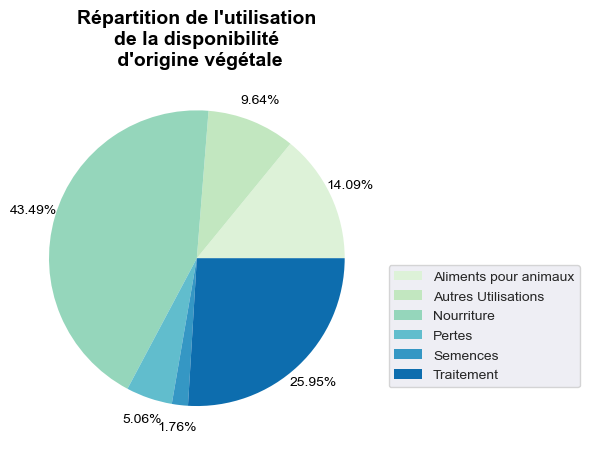

In [70]:
#Création dataframe (préalable au diagramme circulaire)
dispoVegetaleZoneProportion = dispoAlimentaire.loc[dispoAlimentaire['Origine'] == 'vegetale', ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']].sum()

#Graphique : Définition d'un diagramme circulaire pour l'utilisation de la disponibilité d'origine végétale

graphDispoVegetale = plt.pie(x=dispoVegetaleZoneProportion.values, autopct = '%.2f%%', colors=sns.color_palette('GnBu'), pctdistance = 1.15)
sns.set(rc={"figure.figsize":(14,7)}) #largeur et hauteur
plt.title("Répartition de l'utilisation\nde la disponibilité\n d'origine végétale", fontsize=14, fontweight='bold', multialignment='center')
plt.legend(labels=dispoVegetaleZoneProportion.index, loc='best', bbox_to_anchor=(1,0.5), fontsize=10)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [72]:
#Calcul de la disponibilité totale

dispo_totale=round(dispoAlimentaire['Disponibilité intérieure'].sum())
print('La disponibilité intérieure totale est de',dispo_totale,'kg (',(dispo_totale)/1000000,'milliers de tonnes).')

La disponibilité intérieure totale est de 9848994000 kg ( 9848.994 milliers de tonnes).


In [73]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures...
#Commentaires : Disponibilité totale = SOMME(Aliments pour animaux,Autres Utilisations, Nourriture, Pertes, Semences, Traitement)

liste = ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']
for valeur in liste:
    print('Total',valeur,':',round(dispoAlimentaire[valeur].sum()),'kg','(soit',round(dispoAlimentaire[valeur].sum()/(dispoAlimentaire['Aliments pour animaux'].sum()+dispoAlimentaire['Autres Utilisations'].sum()+dispoAlimentaire['Nourriture'].sum()+dispoAlimentaire['Pertes'].sum()+dispoAlimentaire['Semences'].sum()+dispoAlimentaire['Traitement'].sum())*100,2),'% de la disponibilité totale).')

Total Aliments pour animaux : 1304245000 kg (soit 13.23 % de la disponibilité totale).
Total Autres Utilisations : 865023000 kg (soit 8.77 % de la disponibilité totale).
Total Nourriture : 4876258000 kg (soit 49.46 % de la disponibilité totale).
Total Pertes : 453698000 kg (soit 4.6 % de la disponibilité totale).
Total Semences : 154681000 kg (soit 1.57 % de la disponibilité totale).
Total Traitement : 2204687000 kg (soit 22.36 % de la disponibilité totale).


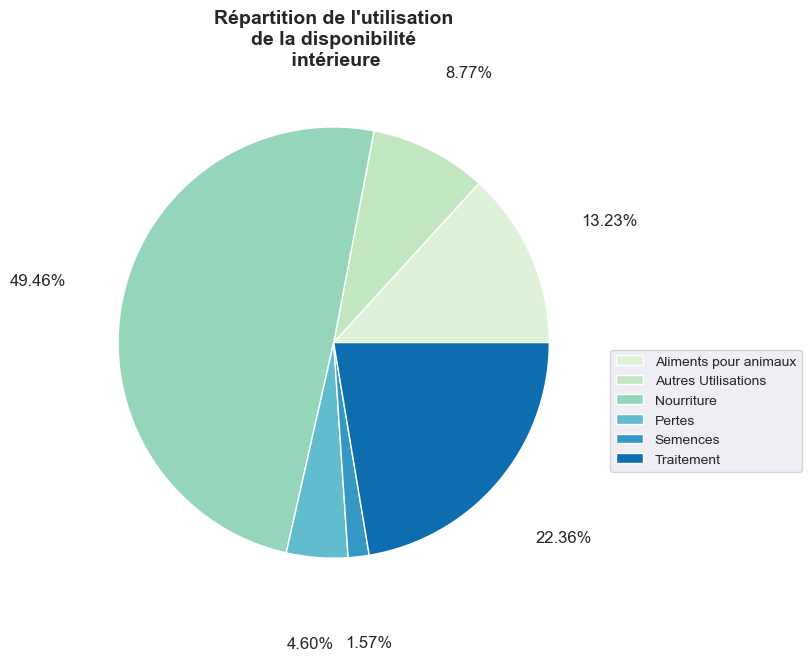

In [74]:
#Création dataframe (préalable au diagramme circulaire)
dispoInterieure = dispoAlimentaire[['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']].sum()

#Graphique : Définition d'un diagramme circulaire pour l'utilisation de la disponibilité intérieure

graphDispoInterieure = plt.pie(x=dispoInterieure.values, autopct = '%.2f%%', colors=sns.color_palette('GnBu'), pctdistance = 1.4)
sns.set(rc={"figure.figsize":(14,7)}) #largeur et hauteur
plt.title('Répartition de l\'utilisation\nde la disponibilité\n intérieure', fontsize=14, fontweight='bold', multialignment='center')
plt.legend(labels=dispoInterieure.index, loc='best', bbox_to_anchor=(1,0.5), fontsize=10)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [76]:
#Création d'une liste avec toutes les variables
liste_cereales=['Avoine','Blé','Céréales, Autres','Maïs','Millet','Orge','Riz (Eq Blanchi)','Seigle','Sorgho']

In [77]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
cereales = dispoAlimentaire.loc[dispoAlimentaire['Produit'].isin(liste_cereales), ['Aliments pour animaux','Autres Utilisations','Nourriture', 'Pertes', 'Semences', 'Traitement']]

In [78]:
#Affichage de la proportion d'alimentation animale et humaine

liste_alimentation_cereales=['Aliments pour animaux','Nourriture','Autres Utilisations','Pertes','Semences','Traitement']
for utilisation in liste_alimentation_cereales:
    print('Total',utilisation,':',round(cereales[utilisation].sum()),'kg',
          '(soit',round(cereales[utilisation].sum()/(cereales['Aliments pour animaux'].sum()+cereales['Autres Utilisations'].sum()+cereales['Nourriture'].sum()+cereales['Pertes'].sum()+cereales['Semences'].sum()+cereales['Traitement'].sum())*100,2),'%).')

Total Aliments pour animaux : 873535000 kg (soit 36.28 %).
Total Nourriture : 1029010000 kg (soit 42.74 %).
Total Autres Utilisations : 234787000 kg (soit 9.75 %).
Total Pertes : 107120000 kg (soit 4.45 %).
Total Semences : 68538000 kg (soit 2.85 %).
Total Traitement : 94589000 kg (soit 3.93 %).


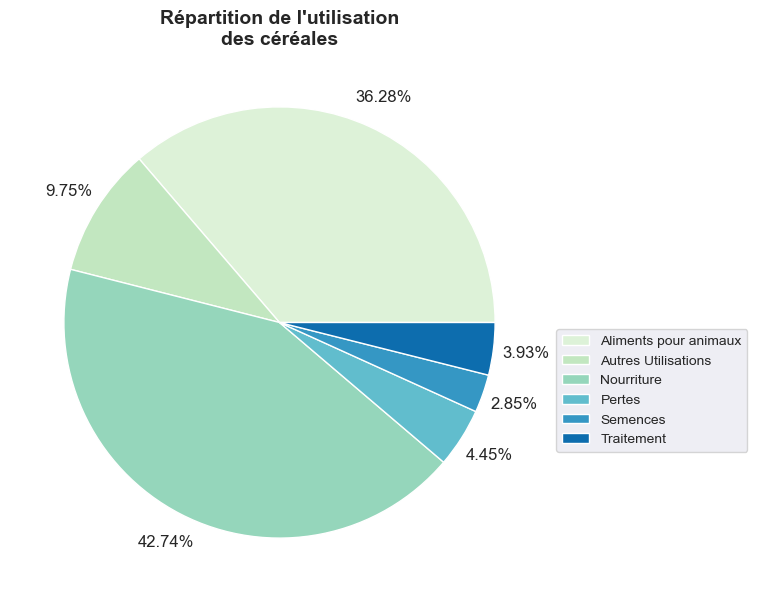

In [79]:
#Création dataframe (préalable au diagramme circulaire)
cereales2 = dispoAlimentaire.loc[dispoAlimentaire['Produit'].isin(liste_cereales), ['Aliments pour animaux','Autres Utilisations','Nourriture', 'Pertes', 'Semences', 'Traitement']]
utilisationCereales = cereales2[['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']].sum()

#Graphique : Définition d'un diagramme circulaire pour l'utilisation des céréales

graphUtilisationCereales = plt.pie(x=utilisationCereales.values, autopct = '%.2f%%', colors=sns.color_palette('GnBu'), pctdistance = 1.15)
sns.set(rc={"figure.figsize":(14,7)}) #largeur et hauteur
plt.title('Répartition de l\'utilisation\ndes céréales', fontsize=14, fontweight='bold', multialignment='center')
plt.legend(labels=utilisationCereales.index, loc='best', bbox_to_anchor=(1,0.5), fontsize=10)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [81]:
#Création colonne Proportion_par_pays
#On utilise le dataframe 'population2017SousNutrition' créé précédemment (on a besoin des données Population + Sous_nutrition pour 2017)

population2017SousNutrition['Proportion_par_pays (%)']=(population2017SousNutrition['Sous_nutrition']/population2017SousNutrition['Population'])*100

In [82]:
#Commentaires : En colonne Sous_nutrition on aperçoit des cellules vides. 
#Calcul du % que représentent les pays non renseignés par rapport à la population mondiale.

population_sous_nutrition_non_renseignée_2017 = round(population2017SousNutrition.loc[population2017SousNutrition['Sous_nutrition'].isna(),'Population'].sum())
population_sous_nutrition_nulle_2017 = round(population2017SousNutrition.loc[population2017SousNutrition['Sous_nutrition']==0,:]['Population'].sum())                            
population_totale_2017 = round(population2017SousNutrition['Population'].sum())

print('Population dont la sous-nutrition est inconnue ou nulle: ',population_sous_nutrition_non_renseignée_2017+population_sous_nutrition_nulle_2017)
print('Population mondiale :',population_totale_2017)
print('La part de données non renseignée représente',round((population_sous_nutrition_non_renseignée_2017+population_sous_nutrition_nulle_2017)/population_totale_2017,2)*100,'% de la population.')

Population dont la sous-nutrition est inconnue ou nulle:  3380180370
Population mondiale : 7548134111
La part de données non renseignée représente 45.0 % de la population.


In [83]:
#affichage après tri des 10 pires pays
populationSousNutrition10pays=population2017SousNutrition.sort_values(by='Proportion_par_pays (%)',ascending=False).head(10).reset_index()
display(populationSousNutrition10pays)

,level_0,index,Zone,Année,Population,Sous_nutrition,Proportion_par_pays (%)
0,87,87,Haïti,2017,10982366.0,5300000.0,48.259182
1,181,181,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.188685
2,128,128,Madagascar,2017,25570512.0,10500000.0,41.062924
3,122,122,Libéria,2017,4702226.0,1800000.0,38.279742
4,119,119,Lesotho,2017,2091534.0,800000.0,38.249438
5,216,216,Tchad,2017,15016753.0,5700000.0,37.957606
6,186,186,Rwanda,2017,11980961.0,4200000.0,35.055619
7,145,145,Mozambique,2017,28649018.0,9400000.0,32.810898
8,219,219,Timor-Leste,2017,1243258.0,400000.0,32.173531
9,0,0,Afghanistan,2017,36296113.0,10500000.0,28.928718


C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_6692\794289362.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph10PaysSousAlim2017.set_xticklabels(graph10PaysSousAlim2017.get_xticklabels(), rotation=35, ha='right') #Orientation des noms d'abscisses à 35°


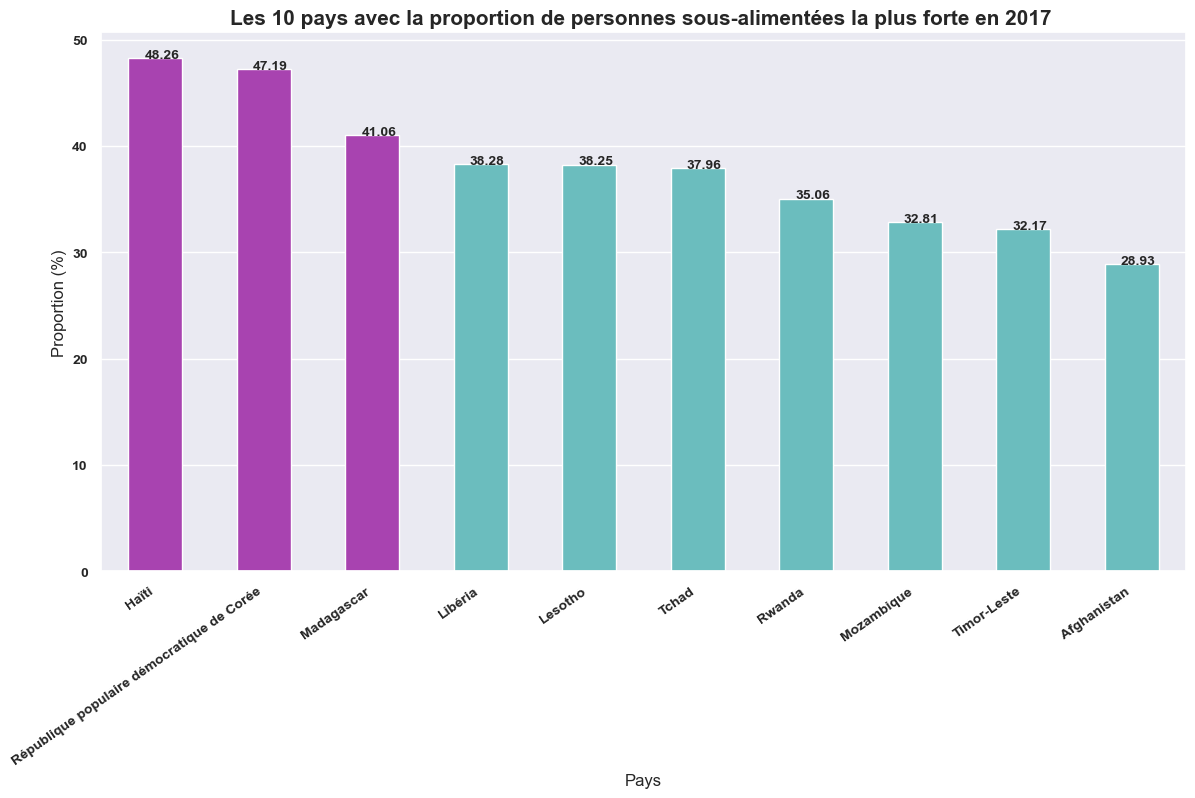

In [84]:
#Graphique : 10 pires pays avec la proportion de personnes sous-alimentée la plus forte en 2017

#Application d'une palette colorimétrique personnalisée au graphique
personnalise=['#B831C2' if y > 40 else '#5DCACC' for y in populationSousNutrition10pays['Proportion_par_pays (%)']]

#Définition du diagramme à barres
graph10PaysSousAlim2017 = sns.barplot(data=populationSousNutrition10pays, x='Zone', y='Proportion_par_pays (%)', errorbar=None, hue='Zone', estimator=sum, width=0.5, palette=personnalise)
sns.set(rc={"figure.figsize":(16, 4)}) #largeur et hauteur
graph10PaysSousAlim2017.set_xticklabels(graph10PaysSousAlim2017.get_xticklabels(), rotation=35, ha='right') #Orientation des noms d'abscisses à 35°
plt.title("Les 10 pays avec la proportion de personnes sous-alimentées la plus forte en 2017 ", fontsize=15,fontweight='bold')
plt.ylabel("Proportion (%)", fontsize=12)
plt.xlabel("Pays", fontsize=12, multialignment='center')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Commentaire : Affichage de la valeur au-dessus de chaque barre
labelGraph10PaysSousAlim2017 = populationSousNutrition10pays['Proportion_par_pays (%)'].tolist()
for i in range (10) : 
    plt.text(i-0.1, labelGraph10PaysSousAlim2017[i], round(labelGraph10PaysSousAlim2017[i],2), fontsize=10, fontweight='bold')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [86]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_pays = aideAlimentaire[['Zone','Aide_alimentaire']].groupby('Zone').sum()
display(aide_alimentaire_pays)

,Aide_alimentaire
Zone,
Afghanistan,185452000
Algérie,81114000
Angola,5014000
Bangladesh,348188000
Bhoutan,2666000
...,...
Zambie,3026000
Zimbabwe,62570000
Égypte,1122000


In [87]:
#affichage après tri des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aidepodium10pays = aide_alimentaire_pays.sort_values(by='Aide_alimentaire',ascending=False).head(10)
display(aidepodium10pays)

,Aide_alimentaire
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_6692\1714128789.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph10PaysPlusAide.set_xticklabels(graph10PaysPlusAide.get_xticklabels(), rotation=35, ha='right') #Orientation des noms d'abscisses à 35°


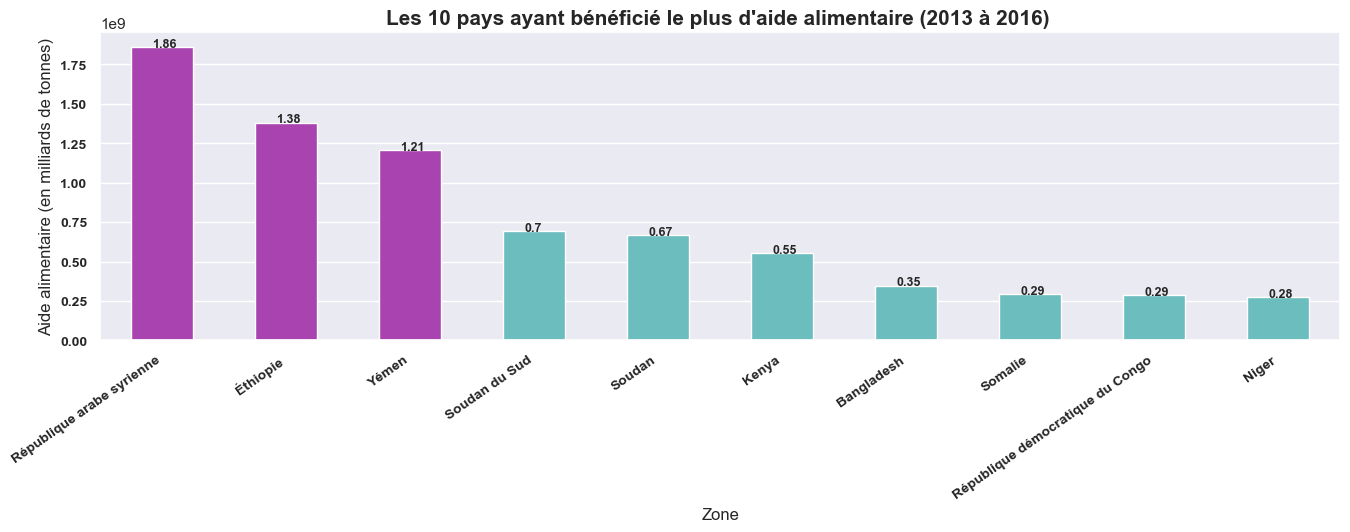

In [88]:
#Graphique : Podium des 10 pays qui ont bénéficié le plus de l'aide alimentaire

#Application d'une palette colorimétrique personnalisée au graphique
personnal=['#B831C2' if y > 1000000000 else '#5DCACC' for y in aidepodium10pays.Aide_alimentaire]

#Définition du diagramme à barres
graph10PaysPlusAide = sns.barplot(data=aidepodium10pays, x='Zone', y='Aide_alimentaire', errorbar=None, hue='Zone', estimator=sum, width=0.5, palette=personnal)
sns.set(rc={"figure.figsize":(16, 4)}) #largeur et hauteur
graph10PaysPlusAide.set_xticklabels(graph10PaysPlusAide.get_xticklabels(), rotation=35, ha='right') #Orientation des noms d'abscisses à 35°
plt.title("Les 10 pays ayant bénéficié le plus d'aide alimentaire (2013 à 2016) ", fontsize=15,fontweight='bold')
plt.ylabel("Aide alimentaire (en milliards de tonnes)", fontsize=12)
plt.xlabel("Zone", fontsize=12)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

#Affichage de la valeur au-dessus de chaque barre
paysAideTop10 = aidepodium10pays['Aide_alimentaire'].tolist()
for i in range (10) : 
    plt.text(i-0.08, paysAideTop10[i], round((paysAideTop10[i]/1000000000),2), fontsize=9, fontweight='bold')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [90]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année

aideAlimentaireParZoneAnnée = aideAlimentaire[['Zone','Année','Aide_alimentaire']].groupby(['Zone','Année']).sum().reset_index()
display(aideAlimentaireParZoneAnnée)

,Zone,Année,Aide_alimentaire
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [91]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
#Commentaires : Lors de la question précédente on observe que pour toutes années confondues, les 5 pays suivants sont ceux ayant bénéficié le plus de l'aide alimentaire.

liste_pays_aide=['République arabe syrienne','Éthiopie','Yémen','Soudan du Sud','Soudan']

In [92]:
#On filtre sur le dataframe avec notre liste

paysAideTop5 = aideAlimentaireParZoneAnnée.loc[aideAlimentaireParZoneAnnée['Zone'].isin(liste_pays_aide)].reset_index()
display(paysAideTop5)

,index,Zone,Année,Aide_alimentaire
0,157,République arabe syrienne,2013,563566000
1,158,République arabe syrienne,2014,651870000
2,159,République arabe syrienne,2015,524949000
3,160,République arabe syrienne,2016,118558000
4,189,Soudan,2013,330230000
5,190,Soudan,2014,321904000
6,191,Soudan,2015,17650000
7,192,Soudan du Sud,2013,196330000
8,193,Soudan du Sud,2014,450610000
9,194,Soudan du Sud,2015,48308000


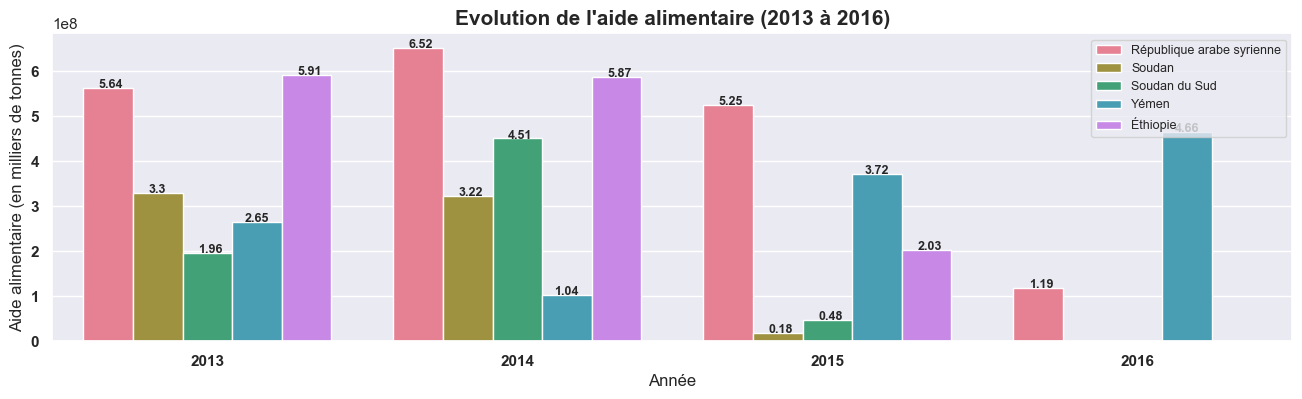

In [93]:
# Graphique : Affichage des pays avec l'aide alimentaire par année

# Commentaire : Aucune donnée en 2016 pour les 3 pays suivants : Ethiopie, Soudan du sud, Soudan

sns.barplot(data=paysAideTop5, x='Année', y='Aide_alimentaire', errorbar=None, hue='Zone', estimator=sum, width=0.8, palette='husl')
sns.set(rc={"figure.figsize":(16, 5)}) #largeur et hauteur
plt.title("Evolution de l'aide alimentaire (2013 à 2016)", fontsize=15,fontweight='bold')
plt.ylabel("Aide alimentaire (en milliers de tonnes)", fontsize=12)
plt.xlabel("Année", fontsize=12)
plt.legend(loc='best',fontsize=9)
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

# République arabe syrienne : affichage de la valeur au-dessus de chaque barre
aideRepubliqueArabeSyrienne = paysAideTop5['Aide_alimentaire'].loc[paysAideTop5['Zone']=='République arabe syrienne'].tolist()
for i in range (4) : 
    plt.text(i-0.35, aideRepubliqueArabeSyrienne[i], round((aideRepubliqueArabeSyrienne[i]/100000000),2), fontsize=9,fontweight='bold')

# Soudan : affichage de la valeur au-dessus de chaque barre
aideSoudan = paysAideTop5['Aide_alimentaire'].loc[paysAideTop5['Zone']=='Soudan'].tolist()
for i in range (3) : 
    plt.text(i-0.19, aideSoudan[i], round((aideSoudan[i]/100000000),2), fontsize=9,fontweight='bold')

# Soudan du Sud : affichage de la valeur au-dessus de chaque barre
aideSoudanSud = paysAideTop5['Aide_alimentaire'].loc[paysAideTop5['Zone']=='Soudan du Sud'].tolist()
for i in range (3) : 
   plt.text(i-0.03, aideSoudanSud[i], round((aideSoudanSud[i]/100000000),2), fontsize=9,fontweight='bold')

# Yémen : affichage de la valeur au-dessus de chaque barre
aideYemen = paysAideTop5['Aide_alimentaire'].loc[paysAideTop5['Zone']=='Yémen'].tolist()
for i in range (4) : 
   plt.text(i+0.12, aideYemen[i], round((aideYemen[i]/100000000),2), fontsize=9,fontweight='bold')

# Éthiopie : affichage de la valeur au-dessus de chaque barre
aideEthiopie = paysAideTop5['Aide_alimentaire'].loc[paysAideTop5['Zone']=='Éthiopie'].tolist()
for i in range (3) : 
    plt.text(i+0.29, aideEthiopie[i], round((aideEthiopie[i]/100000000),2), fontsize=9,fontweight='bold')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [95]:
#Calcul de la disponibilité en kcal par personne par jour par pays

#Commentaire : On peut réutiliser le dataframe 'dispoAlimentaireZone' (groupement par zone en délaissant les notions de produit et d'origine)
dispoAlimentaireZone[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


In [96]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispoAlimentaireZone10PaysLeMoins = dispoAlimentaireZone[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].nsmallest(10, 'Disponibilité alimentaire (Kcal/personne/jour)').reset_index()
dispoAlimentaireZone10PaysLeMoins.loc[:,['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [98]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
dispoAlimentaireZone10PaysLePlus = dispoAlimentaireZone[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)').reset_index()
dispoAlimentaireZone10PaysLePlus.loc[:,['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3708.0
3,États-Unis d'Amérique,3682.0
4,Israël,3610.0
5,Irlande,3602.0
6,Italie,3578.0
7,Luxembourg,3540.0
8,Égypte,3518.0
9,Allemagne,3503.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [100]:
#création d'un dataframe avec uniquement la Thaïlande 

data_thailande=dispoAlimentaire.loc[(dispoAlimentaire['Zone'] == 'Thaïlande') & (dispoAlimentaire['Produit']=='Manioc')]
display(data_thailande)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,NaN,0.0,0.0


In [101]:
#Calcul de la sous nutrition en Thaïlande

#Commentaires : Utilisation méthode '.squeeze' pour retirer le N° de l'index et le titre de la colonne 
#Commentaires : Sous-nutrition en MILLIONS d’habitants (déjà x1 000 000 dans l'étape 2)
sous_nutrition_thailande=(sousNutrition.loc[(sousNutrition['Zone'] == 'Thaïlande') & (sousNutrition['Année'] == 2017), ['Sous_nutrition']]).squeeze()

#Commentaires : Population en MILLIONS d’habitants (déjà x1000 dans l'étape 2)
population_thailande=(population.loc[(population['Zone'] == 'Thaïlande') & (population['Année'] == 2017), ['Population']]).squeeze()

taux_sous_nutrition_thailande=(sous_nutrition_thailande/population_thailande)
print('Le taux de sous nutrition en Thaïlande en 2017 est de :',round(taux_sous_nutrition_thailande,2)*100,'%.')

Le taux de sous nutrition en Thaïlande en 2017 est de : 9.0 %.


In [102]:
# On calcule la proportion exportée en fonction de la proportion produite

data_thailande=dispoAlimentaire.loc[(dispoAlimentaire['Zone'] == 'Thaïlande') & (dispoAlimentaire['Produit']=='Manioc')]

#Commentaires : Exportations de la Thaïlande
exportations_thailande=(data_thailande.loc[(data_thailande['Zone'] == 'Thaïlande'), ['Exportations - Quantité']]).squeeze()
#Commentaires : Production de la Thaïlande
production_thailande=(data_thailande.loc[(data_thailande['Zone'] == 'Thaïlande'), ['Production']]).squeeze()

proportion_export_thailande=(exportations_thailande/production_thailande)
print('La proportion exportée en fonction de la proportion produite est de :',round(proportion_export_thailande,2)*100,'%.')

La proportion exportée en fonction de la proportion produite est de : 83.0 %.


In [103]:
#Calcul de la disponibilité par habitant en Thaïlande

#Commentaires : Disponibilité intérieure totale
dispo_interieure_thailande = data_thailande['Disponibilité intérieure'].sum()

dispo_par_habitant_thailande=(dispo_interieure_thailande/population_thailande)
print('La disponibilité par habitant en Thaïlande est de :',round(dispo_par_habitant_thailande,2),'Kcal/jour.')

La disponibilité par habitant en Thaïlande est de : 0.09 Kcal/jour.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [105]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

In [106]:
#6.1. Nombre théorique de personnes qui pourraientt être nourries avec les produits d'origine animale

#Transfert des données avec les produits d'origine animale dans un nouveau dataframe
#Commentaire : Groupement par zone après avoir filtré uniquement les produits origne = animale

dispoAnimaleZone=(dispoAlimentaire.loc[dispoAlimentaire['Origine'] == 'animale'].groupby(['Zone'])[['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']].sum().reset_index())

#Commentaire : Jointure avec clé = zone et pour type de jointure à gauche car la table dispoAnimaleZone comporte plus de zones que la table population (toutes les zones dans la table population apparaissent aussi dans la table dispoAlimentaire, ce qui n'est pas le cas dans l'autre sens)
populationDispoAnimale=pd.merge(dispoAnimaleZone, population2017, on=['Zone'], how='left')

#Commentaire : Affichage du nouveau dataframe 
display(populationDispoAnimale)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,123000.0,0.0,216.0,79.92,15.23,12.21,2631000.0,0.0,350000.0,2442000.0,63000.0,2280000.0,2000.0,0.0,0.0,2017.0,36296113.0
1,Afrique du Sud,187000.0,115000.0,487.0,139.63,34.66,36.39,7817000.0,1088000.0,1049000.0,7371000.0,83000.0,7614000.0,67000.0,0.0,241000.0,2017.0,57009756.0
2,Albanie,101000.0,2000.0,985.0,389.05,67.72,59.41,1432000.0,10000.0,87000.0,1235000.0,94000.0,1355000.0,0.0,0.0,0.0,2017.0,2884169.0
3,Algérie,0.0,1000.0,378.0,176.78,22.36,24.98,7120000.0,6000.0,2731000.0,6932000.0,166000.0,4395000.0,21000.0,0.0,0.0,2017.0,41389189.0
4,Allemagne,2087000.0,869000.0,1042.0,388.70,77.99,61.49,35409000.0,22977000.0,14711000.0,32159000.0,64000.0,43621000.0,76000.0,156000.0,55000.0,2017.0,82658409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,0.0,70000.0,557.0,227.06,34.16,41.70,2227000.0,1017000.0,2781000.0,2122000.0,30000.0,412000.0,3000.0,0.0,49000.0,2017.0,9487203.0
170,Équateur,199000.0,4000.0,614.0,217.70,45.16,36.50,3688000.0,860000.0,250000.0,3425000.0,53000.0,4295000.0,13000.0,0.0,2000.0,2017.0,16785361.0
171,États-Unis d'Amérique,3143000.0,9597000.0,984.0,411.71,67.69,69.77,145969000.0,23082000.0,12365000.0,131767000.0,225000.0,154474000.0,1373000.0,24000.0,2210000.0,2017.0,325084756.0
172,Éthiopie,18000.0,0.0,124.0,53.56,8.01,7.69,5190000.0,23000.0,17000.0,5041000.0,131000.0,5195000.0,5000.0,0.0,0.0,2017.0,106399924.0


In [107]:
#Calcul du nombre de kcal disponible pour les produits originie = animale

#Explications : pour chaque zone multiplier colonne "Disponibilité alimentaire (Kcal/personne/jour)" par "Population"
populationDispoAnimale['Dispo_kcal']=populationDispoAnimale['Disponibilité alimentaire (Kcal/personne/jour)']*populationDispoAnimale['Population']
populationDispoAnimale.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Dispo_kcal
0,Afghanistan,123000.0,0.0,216.0,79.92,15.23,12.21,2631000.0,0.0,350000.0,2442000.0,63000.0,2280000.0,2000.0,0.0,0.0,2017.0,36296113.0,7.839960e+09
1,Afrique du Sud,187000.0,115000.0,487.0,139.63,34.66,36.39,7817000.0,1088000.0,1049000.0,7371000.0,83000.0,7614000.0,67000.0,0.0,241000.0,2017.0,57009756.0,2.776375e+10
2,Albanie,101000.0,2000.0,985.0,389.05,67.72,59.41,1432000.0,10000.0,87000.0,1235000.0,94000.0,1355000.0,0.0,0.0,0.0,2017.0,2884169.0,2.840906e+09
3,Algérie,0.0,1000.0,378.0,176.78,22.36,24.98,7120000.0,6000.0,2731000.0,6932000.0,166000.0,4395000.0,21000.0,0.0,0.0,2017.0,41389189.0,1.564511e+10
4,Allemagne,2087000.0,869000.0,1042.0,388.70,77.99,61.49,35409000.0,22977000.0,14711000.0,32159000.0,64000.0,43621000.0,76000.0,156000.0,55000.0,2017.0,82658409.0,8.613006e+10


In [108]:
#Calcul du nombre d'humains pouvant être nourris avec les produits d'origine animale

#Définition de la valeur 'kcal_moyen_jour' qui correspond à un besoin journalier moyen de 2100 calories par être humain 
kcal_moyen_jour = 2100

#Calcul final : Nombre hommes pouvant etre nourris = SOMME ((Dispo par pays)x(Pop totale par pays)) / (Kcal/jr/homme besoins) ]
nombre_theorique_nourris_animale=round(((populationDispoAnimale['Dispo_kcal']).sum())/kcal_moyen_jour)
print('En théorie,',nombre_theorique_nourris_animale,'hommes dans le monde pourraient être nourris avec la disponibilité sur les produits animaux en 2017.')

#Commentaires : Nombre total de la population mondiale en 2017
population_totale_2017=round(population2017['Population'].sum())
print('En 2017, la population totale mondiale est de',population_totale_2017,'hommes.')
print('Cela représente',round((nombre_theorique_nourris_animale/population_totale_2017)*100),'% de la population mondiale.')

# Combien de Kcal par personne et par jour ?
kcal_DispoAnimale = round((populationDispoAnimale['Dispo_kcal'].sum())/(populationDispoAnimale['Population'].sum()))
print('Cela représente',kcal_DispoAnimale,'Kcal/jour/personne.')

En théorie, 1742009722 hommes dans le monde pourraient être nourris avec la disponibilité sur les produits animaux en 2017.
En 2017, la population totale mondiale est de 7548134111 hommes.
Cela représente 23 % de la population mondiale.
Cela représente 502 Kcal/jour/personne.


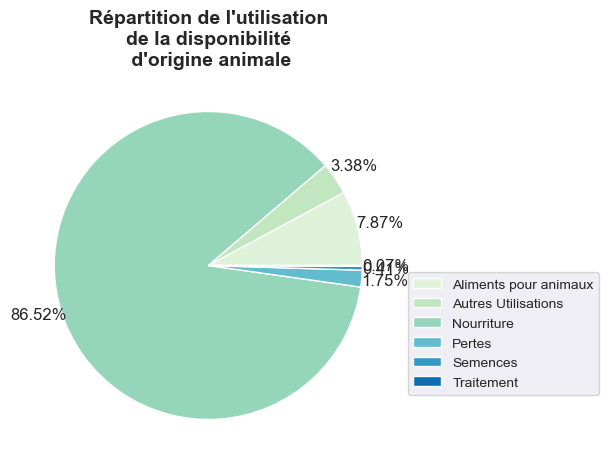

In [109]:
#Création dataframe (préalable au diagramme circulaire)
dispoAnimaleZoneProportion = dispoAlimentaire.loc[dispoAlimentaire['Origine'] == 'animale', ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']].sum()

#Graphique : Définition d'un diagramme circulaire pour l'utilisation de la disponibilité d'origine animale

graphDispoAnimale = plt.pie(x=dispoAnimaleZoneProportion.values, autopct = '%.2f%%', colors=sns.color_palette('GnBu'), pctdistance = 1.15)
sns.set(rc={"figure.figsize":(14,7)}) #largeur et hauteur
plt.title("Répartition de l'utilisation\nde la disponibilité\n d'origine animale", fontsize=14, fontweight='bold', multialignment='center')
plt.legend(labels=dispoAnimaleZoneProportion.index, loc='best', bbox_to_anchor=(1,0.5), fontsize=10)
plt.show()

In [110]:
#6.2 Focus sur l'aide alimentaire : types de produits ayant le plus bénéficié d'aides

aideAlimentaire[['Produit','Aide_alimentaire']].groupby('Produit').sum().sort_values(by='Aide_alimentaire',ascending=False)

,Aide_alimentaire
Produit,
Céréales,4256884000
Blé et Farin,1781515000
Non-céréales,1261513000
Céréales Secondaires,1166565000
"Riz, total",742418000
"Légumineuses Sèches,Tot.",737398000
Mélanges et préparations,425839000
Huiles végétales,344973000
BulgurFarEnt,140547000
